In [1]:
#microns = [0.9 ,  1.5 , 3.22, 4.44,  7.7]  #wavelength in microns
microns = [0.9 ,  1.5]  #wavelength in microns
sol =  299792458.00  #speed of light in metre
nus = []
nus.append(2.418e17) #1 kev
for micron in microns:
  meter = micron * 1e-6  #wavelength in metre
  freq = sol/meter  #frquency in Hz
  nus.append(freq)

nus.append(8e9) #8 ghz
nus.append(0.144e9) #0.144 ghz
nus.append(1.5e9) #1.5 ghz
nus.append(3e9) #3 ghz
#labels=['1 KeV',r'0.9 $\mu$m', r'1.5 $\mu$n',r'3.22 $\mu$m', r'4.44 $\mu$m',  r'7.7 $\mu$m', '8 GHz',]
labels=['1 KeV',r'0.9 $\mu$m', r'1.5 $\mu$n','8 GHz','0.144 GHz','1.5 GHz','3 GHz']
#labels=['8 GHz','0.144 GHz','1.5 GHz','3 GHz']

In [2]:
sol =  299792458.00  #speed of light in metre
nus = [1.5e9]

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
import afterglowpy as grb
import numpy as np
import math
from astropy.io import ascii
%matplotlib inline

In [ ]:
counterjet=True #for 90 degrees

In [25]:
# Define the Flux function
def Flux(t, nus, E0, n0, z=0.12817, ld=605.3):
    sol = 299792458.00  # speed of light in meter
    jetType = 0  # gaussian #-1 for tophat #4 for powerlaw
    thetaObs = math.radians(90)  # Viewing angle in radians
    thetaC = math.radians(10)  # Half-opening angle in radians
    thetaW = 5 * thetaC  # Truncation angle, unused for top-hat
    b = 2  # power law index, unused for top-hat
    p = 2.6  # electron energy distribution index
    eps_e = 0.005     # epsilon_e 
    eps_B = 0.01    # epsilon_B 
    xi_N = 0.8 
    xi_N = 0.8  # Fraction of electrons accelerated
    dL = ld * 3.08568 * 10 ** 24  # Luminosity distance in cm

    Y = np.array([thetaObs, E0, thetaC, thetaW, b, 0, 0, 0, n0, p, eps_e, eps_B, xi_N, dL])
   # Z = {'z': z}
    Z = {'z': z, 'counterjet': True} #for 90 deg
    # Calculate!
    Fnu = grb.fluxDensity(t, nus, jetType, 0, *Y, **Z)
    return Fnu

# Define the function to check if flux is within detection range
def check_flux(t, flux_lc, F_det, F_det_err):
    RuledOut = False
    for i in range(len(F_det)):
        flux_test2 = np.interp(t_p[i], t/86400, flux_lc)
        F_upper = F_det[i] + F_det_err[i]
        F_lower = F_det[i] - F_det_err[i]

        if (flux_test2 > F_upper) or (flux_test2 < F_lower):
            RuledOut = True
    return RuledOut

## 90 deg

In [26]:
#90 deg
if __name__ == '__main__':
    # Define parameters
    t_p = [682]
    D = 605.3 #Mpc
    F_det = [0.17265]
    F_det_err = [0.0089]
    nus = [1.5e9]

    # Define the grid of E0 and n0
    #E0 = np.logspace(np.log10(6.324555320336758e+52), np.log10(1e+54), num=50)
    E0 = np.logspace(np.log10(1e+52), np.log10(1e+55), num=50)
    n0 = np.logspace(np.log10(0.001e1), np.log10(1.0e2), num=50)

    # Initialize lists to store results
    Fp_g, E0_g, n0_g, RuledOut_g = [], [], [], []

    # Iterate over combinations of E0 and n0
    for E0_val in E0:
        for n0_val in n0:
            t = np.geomspace(1.0e1, 7e9, 300)#[:, None]  # Define t here for each combination of E0 and n0
            flux_lc = Flux(t, nus, E0_val, n0_val)
            ruled_out = check_flux(t, flux_lc, F_det, F_det_err)

            # Append results to lists
            Fp_g.append(flux_lc)
            E0_g.append(E0_val)
            n0_g.append(n0_val)
            RuledOut_g.append(ruled_out)

    # Save results to a CSV file

np.save('Fp_90_R18_T.npy', Fp_g)
file_out2 = 'R18_90tEnR_T.csv' 
data2 = [E0_g,n0_g,RuledOut_g]
names2 = ['E_ergs','n_density','RuledOut']
ascii.write(data2,file_out2,names=names2,overwrite=True,format='csv')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/afterglowpy/flux.py:663: FutureWarning: Positional argument inferface to afterglowpy may not be supported in the future. Use keyword arguments instead, see documentation for details.
  warnings.warn("Positional argument inferface to afterglowpy"


(1e-07, 10000.0)

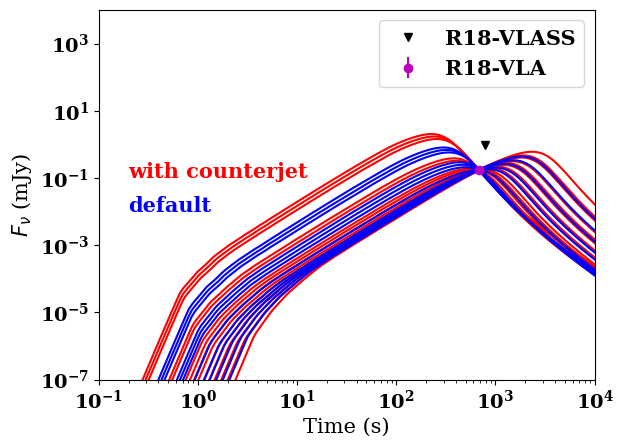

In [27]:
#Theta_obs = 90 deg
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

t = np.geomspace(1.0e1, 7e9, 300)
#loaded_array = np.load('Fp_60_R4_4b.npy') #Flux density for 60 deg1
loaded_array = np.load('Fp_90_R18_T.npy') #Flux density for 60 deg2

#file_in = 'R4_4b_60tEnR.csv' #other parameters 1
file_in = 'R18_90tEnR_T.csv' #other parameters 2

data_plot = ascii.read(file_in)

indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
Ergs = data_plota['E_ergs']
n_density = data_plota['n_density']
#print(Ergs,n_density)
flux_array = loaded_array[indexa]

for i in range(len(n_density)):
    #Plot it:
    plt.plot(t/86400,flux_array[i], color='r')

loaded_array = np.load('Fp_90_R18.npy') #Flux density for 60 deg2

#file_in = 'R4_4b_60tEnR.csv' #other parameters 1
file_in = 'R18_90tEnR.csv' #other parameters 2

data_plot = ascii.read(file_in)

indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
Ergs = data_plota['E_ergs']
n_density = data_plota['n_density']
#print(Ergs,n_density)
flux_array = loaded_array[indexa]

for i in range(len(n_density)):
    #Plot it:
    plt.plot(t/86400,flux_array[i], color='b')

plt.xscale('log')
plt.yscale('log')
plt.errorbar(682,0.17265,0.0089,fmt='om', label='R18-VLA')
plt.plot(1460-682,0.97,'vk', label='R18-VLASS')
#plt.plot(1460-682,0.97,'vb', label='R18-VLASS')
plt.text(0.2,0.1,'with counterjet', color='r')
plt.text(0.2,0.01,'default', color='b')

plt.ylabel(r'$F_\nu$ (mJy)')
plt.xlabel('Time (s)')
plt.legend()
#plt.title(f'Viewing angle {math.degrees(thetaObs)} deg')
plt.xlim(1e-1,1e4)
plt.ylim(1e-7,1e4)

In [ ]:
0.12mJy*5 = 0.6mJy
#time of FRB discovery = 20190417A (April 17th 2019)
#VLASS non-detection happened before FRB discovery and is ~ 2017 
#time of radio observation = Feb 25-27 2021
t_difference = 1460 #(assuming 4 years betwen VLASS and VLA) #682 #days #lower limit on age

In [9]:
#estimate S_1.4 from S_vlass and S_lotss
S0 = 0.6e-3
V0 = 3e9
V1 = 1.5*1e9
ap = -0.7

S1 = S0 * (V1/V0)**(ap)
S1*1e3 #0.9099mJy for VLASS, 6.0971 for Lotss

0.9747028756274825

2500
17 2483


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


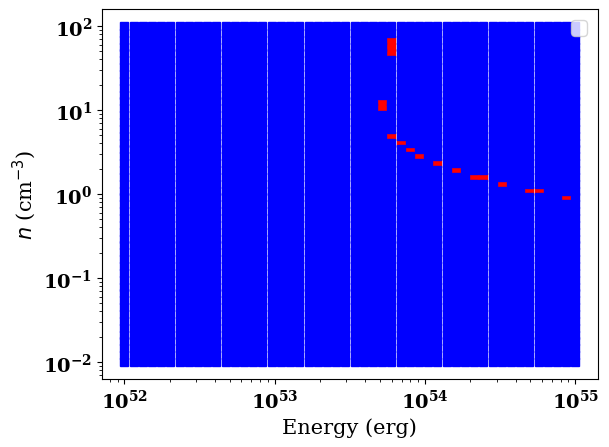

In [28]:

#Theta_obs = 90 deg
file_in = 'R18_90tEnR_T.csv' 
data_plot = ascii.read(file_in)

indexa = np.where(data_plot['RuledOut'] == 'False')[0]
indexna = np.where(data_plot['RuledOut'] == 'True')[0]
print(len(data_plot))
print(len(indexa),len(indexna))

data_plota = data_plot[indexa]
data_plotna = data_plot[indexna]
Ergs = data_plota['E_ergs']
n_density = data_plota['n_density']

Ergs2 = data_plotna['E_ergs']
n_density2 = data_plotna['n_density']
#print(Ergs,n_density)
#flux_array = loaded_array[indexa]

for i in range(len(n_density)):
    #Plot it:
    plt.plot(Ergs[i],n_density[i], 's',color='r') #allowed
for i in range(len(n_density2)):
    plt.plot(Ergs2[i],n_density2[i],'s', color='b') #not allowed

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.xlabel('Energy (erg)')
plt.legend()

## 60 deg

In [11]:
#60 deg
if __name__ == '__main__':
    # Define parameters
    t_p = [682]
    D = 605.3 #Mpc
    F_det = [0.17265]
    F_det_err = [0.0089]
    nus = [1.5e9]

    # Define the grid of E0 and n0
    #E0 = np.logspace(np.log10(6.324555320336758e+52), np.log10(1e+54), num=50)
    E0 = np.logspace(np.log10(1e+52), np.log10(1e+55), num=50)
    n0 = np.logspace(np.log10(0.001e1), np.log10(1.0e2), num=50)

    # Initialize lists to store results
    Fp_g, E0_g, n0_g, RuledOut_g = [], [], [], []

    # Iterate over combinations of E0 and n0
    for E0_val in E0:
        for n0_val in n0:
            t = np.geomspace(1.0e1, 7e9, 300)#[:, None]  # Define t here for each combination of E0 and n0
            flux_lc = Flux(t, nus, E0_val, n0_val)
            ruled_out = check_flux(t, flux_lc, F_det, F_det_err)

            # Append results to lists
            Fp_g.append(flux_lc)
            E0_g.append(E0_val)
            n0_g.append(n0_val)
            RuledOut_g.append(ruled_out)

    # Save results to a CSV file

np.save('Fp_60_R18.npy', Fp_g)
file_out2 = 'R18_60tEnR.csv' 
data2 = [E0_g,n0_g,RuledOut_g]
names2 = ['E_ergs','n_density','RuledOut']
ascii.write(data2,file_out2,names=names2,overwrite=True,format='csv')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/afterglowpy/flux.py:663: FutureWarning: Positional argument inferface to afterglowpy may not be supported in the future. Use keyword arguments instead, see documentation for details.
  warnings.warn("Positional argument inferface to afterglowpy"


(1e-07, 10000.0)

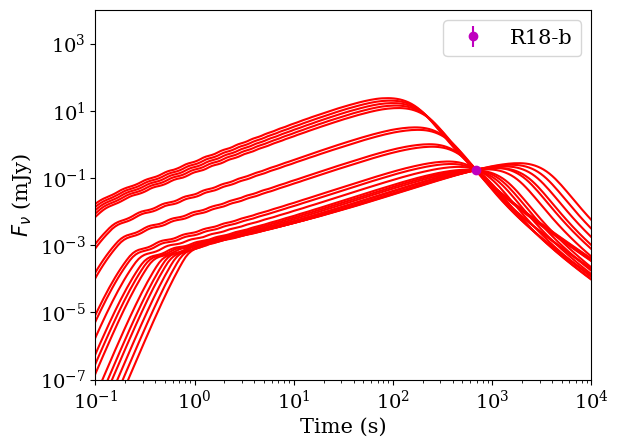

In [11]:
#Theta_obs = 60 deg
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

t = np.geomspace(1.0e1, 7e9, 300)
#loaded_array = np.load('Fp_60_R4_4b.npy') #Flux density for 60 deg1
loaded_array = np.load('Fp_60_R18.npy') #Flux density for 60 deg2

#file_in = 'R4_4b_60tEnR.csv' #other parameters 1
file_in = 'R18_60tEnR.csv' #other parameters 2

data_plot = ascii.read(file_in)

indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
Ergs = data_plota['E_ergs']
n_density = data_plota['n_density']
#print(Ergs,n_density)
flux_array = loaded_array[indexa]

for i in range(len(n_density)):
    #Plot it:
    plt.plot(t/86400,flux_array[i], color='r')

plt.xscale('log')
plt.yscale('log')
plt.errorbar(682,0.17265,0.0089,fmt='om', label='R18-b')

plt.ylabel(r'$F_\nu$ (mJy)')
plt.xlabel('Time (s)')
plt.legend()
#plt.title(f'Viewing angle {math.degrees(thetaObs)} deg')
plt.xlim(1e-1,1e4)
plt.ylim(1e-7,1e4)

2500
21 2479


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


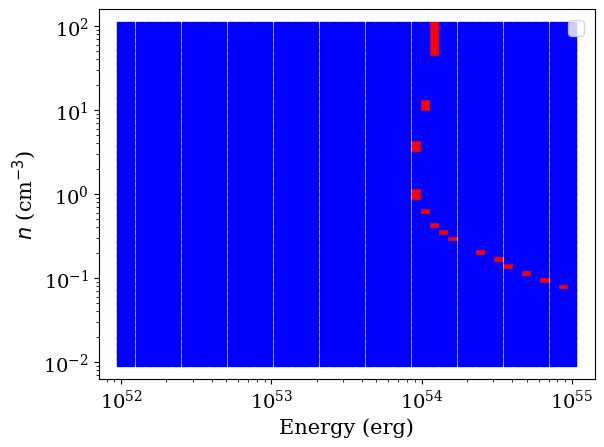

In [12]:

#Theta_obs = 60 deg
file_in = 'R18_60tEnR.csv' 
data_plot = ascii.read(file_in)

indexa = np.where(data_plot['RuledOut'] == 'False')[0]
indexna = np.where(data_plot['RuledOut'] == 'True')[0]
print(len(data_plot))
print(len(indexa),len(indexna))

data_plota = data_plot[indexa]
data_plotna = data_plot[indexna]
Ergs = data_plota['E_ergs']
n_density = data_plota['n_density']

Ergs2 = data_plotna['E_ergs']
n_density2 = data_plotna['n_density']
#print(Ergs,n_density)
#flux_array = loaded_array[indexa]

for i in range(len(n_density)):
    #Plot it:
    plt.plot(Ergs[i],n_density[i], 's',color='r') #allowed
for i in range(len(n_density2)):
    plt.plot(Ergs2[i],n_density2[i],'s', color='b') #not allowed

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.xlabel('Energy (erg)')
plt.legend()

## 30 deg

In [11]:
#30 deg
if __name__ == '__main__':
    # Define parameters
    t_p = [682]
    D = 605.3 #Mpc
    F_det = [0.17265]
    F_det_err = [0.0089]
    nus = [1.5e9]

    # Define the grid of E0 and n0
    #E0 = np.logspace(np.log10(6.324555320336758e+52), np.log10(1e+54), num=50)
    E0 = np.logspace(np.log10(1e+52), np.log10(1e+55), num=50)
    n0 = np.logspace(np.log10(0.001e1), np.log10(1.0e2), num=50)

    # Initialize lists to store results
    Fp_g, E0_g, n0_g, RuledOut_g = [], [], [], []

    # Iterate over combinations of E0 and n0
    for E0_val in E0:
        for n0_val in n0:
            t = np.geomspace(1.0e1, 7e9, 300)#[:, None]  # Define t here for each combination of E0 and n0
            flux_lc = Flux(t, nus, E0_val, n0_val)
            ruled_out = check_flux(t, flux_lc, F_det, F_det_err)

            # Append results to lists
            Fp_g.append(flux_lc)
            E0_g.append(E0_val)
            n0_g.append(n0_val)
            RuledOut_g.append(ruled_out)

    # Save results to a CSV file
np.save('Fp_30_R18.npy', Fp_g)
#np.save('Fp_30_R18.npy', Fp_g)
file_out2 = 'R18_30tEnR.csv' 
data2 = [E0_g,n0_g,RuledOut_g]
names2 = ['E_ergs','n_density','RuledOut']
ascii.write(data2,file_out2,names=names2,overwrite=True,format='csv')


(1e-07, 10000.0)

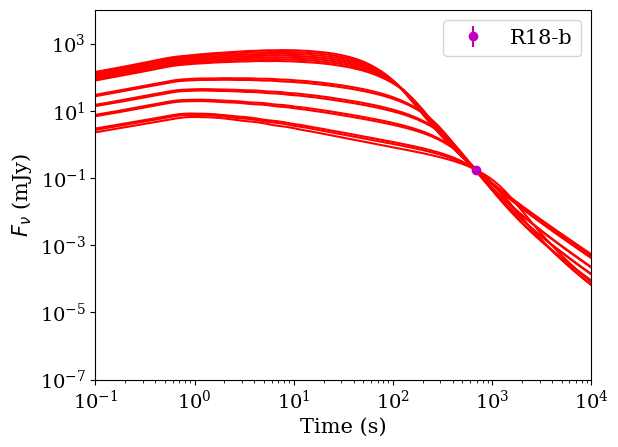

In [12]:
#Theta_obs = 30 deg
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

t = np.geomspace(1.0e1, 7e9, 300)
#loaded_array = np.load('Fp_60_R4_4b.npy') #Flux density for 60 deg1
loaded_array = np.load('Fp_30_R18.npy') #Flux density for 60 deg2

#file_in = 'R4_4b_60tEnR.csv' #other parameters 1
file_in = 'R18_30tEnR.csv' #other parameters 2

data_plot = ascii.read(file_in)

indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
Ergs = data_plota['E_ergs']
n_density = data_plota['n_density']
#print(Ergs,n_density)
flux_array = loaded_array[indexa]

for i in range(len(n_density)):
    #Plot it:
    plt.plot(t/86400,flux_array[i], color='r')

plt.xscale('log')
plt.yscale('log')
plt.errorbar(682,0.17265,0.0089,fmt='om', label='R18-b')

plt.ylabel(r'$F_\nu$ (mJy)')
plt.xlabel('Time (s)')
plt.legend()
#plt.title(f'Viewing angle {math.degrees(thetaObs)} deg')
plt.xlim(1e-1,1e4)
plt.ylim(1e-7,1e4)

2500
16 2484


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


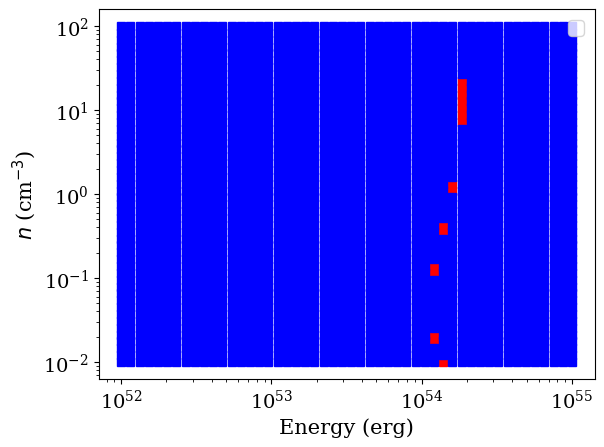

In [13]:

#Theta_obs = 60 deg
file_in = 'R18_30tEnR.csv' 
data_plot = ascii.read(file_in)

indexa = np.where(data_plot['RuledOut'] == 'False')[0]
indexna = np.where(data_plot['RuledOut'] == 'True')[0]
print(len(data_plot))
print(len(indexa),len(indexna))

data_plota = data_plot[indexa]
data_plotna = data_plot[indexna]
Ergs = data_plota['E_ergs']
n_density = data_plota['n_density']

Ergs2 = data_plotna['E_ergs']
n_density2 = data_plotna['n_density']
#print(Ergs,n_density)
#flux_array = loaded_array[indexa]

for i in range(len(n_density)):
    #Plot it:
    plt.plot(Ergs[i],n_density[i], 's',color='r') #allowed
for i in range(len(n_density2)):
    plt.plot(Ergs2[i],n_density2[i],'s', color='b') #not allowed

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.xlabel('Energy (erg)')
plt.legend()

/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3524/955991431.py:125: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(sorted_x1a,sorted_y1a,'d-',color='#F1BF98',markeredgecolor='k',linestyle='--')#, label='20190417A-S1')
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3524/955991431.py:126: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(sorted_x2a,sorted_y2a,'d-',color='#784473',markeredgecolor='k',linestyle='--',)# label=r'$\theta_{obs} = 60^{0}$')
/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_3524/955991431.py:128: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "d-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.p

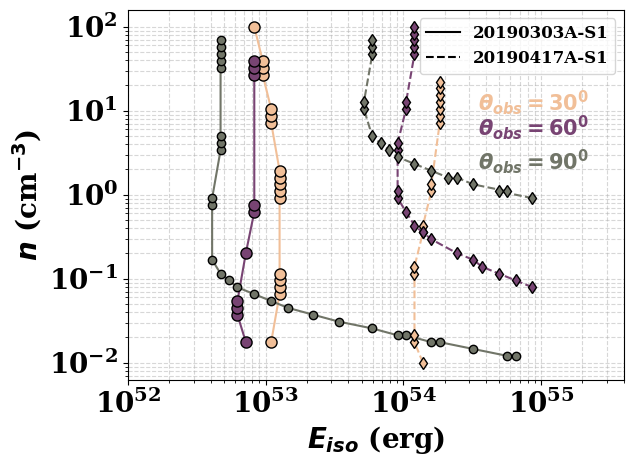

In [7]:
import itertools
#for i in range(len(n_density)):
#    #Plot it:
#    plt.plot(Ergs[i],n_density[i],'s-',color='r') #allowed
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 20})
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
from matplotlib import rc,rcParams
rc('font', weight='bold')
#fig = plt.subplots(figsize=(10,10))
plt.tick_params(labelsize=20)

############### R4-S1  ######################################
file_in = 'R4_30tEnR.csv' #for 2
data_plot = ascii.read(file_in)
indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
Ergs = data_plota['E_ergs']
n_density = data_plota['n_density']

sorted_indices1 = np.argsort(n_density)
# Sort both arrays based on the sorted indices of n_density
sorted_x1 = Ergs[sorted_indices1]
sorted_y1 = n_density[sorted_indices1]

file_in2 = 'R4_60tEnR.csv' #for 2
data_plot2 = ascii.read(file_in2)
indexa2 = np.where(data_plot2['RuledOut'] == 'False')[0]
data_plota2 = data_plot2[indexa2]
Ergs2 = data_plota2['E_ergs']
n_density2 = data_plota2['n_density']

sorted_indices2 = np.argsort(n_density2)
# Sort both arrays based on the sorted indices of n_density
sorted_x2 = Ergs2[sorted_indices2]
sorted_y2 = n_density2[sorted_indices2]

#file_in3 = 'R4_4b_tEnR.csv' #for 1
file_in3 = 'R4_90tEnR.csv' #for 2
data_plot3 = ascii.read(file_in3)
indexa3 = np.where(data_plot3['RuledOut'] == 'False')[0]
data_plota3 = data_plot3[indexa3]
Ergs3 = data_plota3['E_ergs']
n_density3 = data_plota3['n_density']

sorted_indices3 = np.argsort(n_density3)
# Sort both arrays based on the sorted indices of n_density
sorted_x3 = Ergs3[sorted_indices3]
sorted_y3 = n_density3[sorted_indices3]

file_in3t = 'R4_90tEnR_T.csv' #for 2
data_plot3t = ascii.read(file_in3t)
indexa3t = np.where(data_plot3t['RuledOut'] == 'False')[0]
data_plota3t = data_plot3t[indexa3t]
Ergs3t = data_plota3t['E_ergs']
n_density3t = data_plota3t['n_density']

sorted_indices3t = np.argsort(n_density3t)
# Sort both arrays based on the sorted indices of n_density
sorted_x3t = Ergs3t[sorted_indices3t]
sorted_y3t = n_density3t[sorted_indices3t]
###################### ################################

###################### R18-S1 ################################
file_ina = 'R18_30tEnR.csv' #for 2
data_plota = ascii.read(file_ina)
indexa1 = np.where(data_plota['RuledOut'] == 'False')[0]
data_plota1 = data_plota[indexa1]
Ergsa = data_plota1['E_ergs']
n_densitya = data_plota1['n_density']

sorted_indices1a = np.argsort(n_densitya)
# Sort both arrays based on the sorted indices of n_density
sorted_x1a = Ergsa[sorted_indices1a]
sorted_y1a = n_densitya[sorted_indices1a]

file_in2a = 'R18_60tEnR.csv' #for 2
data_plot2a = ascii.read(file_in2a)
indexa2a = np.where(data_plot2a['RuledOut'] == 'False')[0]
data_plota2a = data_plot2a[indexa2a]
Ergs2a = data_plota2a['E_ergs']
n_density2a = data_plota2a['n_density']

sorted_indices2a = np.argsort(n_density2a)
# Sort both arrays based on the sorted indices of n_density
sorted_x2a = Ergs2a[sorted_indices2a]
sorted_y2a = n_density2a[sorted_indices2a]

file_in3a = 'R18_90tEnR.csv' #for 2
data_plot3a = ascii.read(file_in3a)
indexa3a = np.where(data_plot3a['RuledOut'] == 'False')[0]
data_plota3a = data_plot3a[indexa3a]
Ergs3a = data_plota3a['E_ergs']
n_density3a = data_plota3a['n_density']

sorted_indices3a = np.argsort(n_density3a)
# Sort both arrays based on the sorted indices of n_density
sorted_x3a = Ergs3a[sorted_indices3a]
sorted_y3a = n_density3a[sorted_indices3a]

file_in3at = 'R18_90tEnR_T.csv' #for 2
data_plot3at = ascii.read(file_in3at)
indexa3at = np.where(data_plot3at['RuledOut'] == 'False')[0]
data_plota3at = data_plot3at[indexa3at]
Ergs3at = data_plota3at['E_ergs']
n_density3at = data_plota3at['n_density']

sorted_indices3at = np.argsort(n_density3at)
# Sort both arrays based on the sorted indices of n_density
sorted_x3at = Ergs3at[sorted_indices3at]
sorted_y3at = n_density3at[sorted_indices3at]
#################################################################

############### R4-S1  ######################################
plt.plot(sorted_x1[0],sorted_y1[0],color='k',markeredgecolor='k',linestyle='-', label='20190303A-S1')  
plt.plot(sorted_x1,sorted_y1,'o-',ms=8,color='#F1BF98',markeredgecolor='k')#, label='20190303A-S1')  
plt.plot(sorted_x2,sorted_y2,'o-',ms=8,color='#784473',markeredgecolor='k')#, label=r'$\theta_{obs} = 60^{0}$')
#plt.plot(sorted_x3,sorted_y3,'o-',ms=8,color='#717568',markeredgecolor='k')#, label=r'$\theta_{obs} = 90^{0}$') 
plt.plot(sorted_x3t,sorted_y3t,'o-',color='#717568',markeredgecolor='k')# label=r'$\theta_{obs} = 90^{0}$') 


############### R18-S1  ######################################
plt.plot(sorted_x1a[0],sorted_y1a[0],color='k',markeredgecolor='k',linestyle='--', label='20190417A-S1')  
plt.plot(sorted_x1a,sorted_y1a,'d-',color='#F1BF98',markeredgecolor='k',linestyle='--')#, label='20190417A-S1')  
plt.plot(sorted_x2a,sorted_y2a,'d-',color='#784473',markeredgecolor='k',linestyle='--',)# label=r'$\theta_{obs} = 60^{0}$')
#plt.plot(sorted_x3a,sorted_y3a,'d-',color='#717568',markeredgecolor='k',linestyle='--',)# label=r'$\theta_{obs} = 90^{0}$') 
plt.plot(sorted_x3at,sorted_y3at,'d-',color='#717568',markeredgecolor='k',linestyle='--',)# label=r'$\theta_{obs} = 90^{0}$') 


plt.text(3.5e54,1e1,r'$\theta_{obs} = 30^{0}$', color ='#F1BF98', fontsize =15, fontweight= 'bold')
plt.text(3.5e54,5,r'$\theta_{obs} = 60^{0}$', color ='#784473', fontsize =15,fontweight= 'bold')
plt.text(3.5e54,2,r'$\theta_{obs} = 90^{0}$', color ='#717568', fontsize =15,fontweight= 'bold')

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$n$ (cm$^{-3}$)',fontweight='bold', fontsize=20)
plt.xlabel(r'${E}_{iso}$ (erg)', fontweight='bold', fontsize=20)
plt.legend(fontsize=12)
plt.xlim(1e52,4e55)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.savefig("grb-afterglow.jpeg",dpi=300,bbox_inches='tight')

In [8]:
#R18 for original time
print(sorted_x3t,sorted_y3t) #30 deg, 1.39-1.84e54, 0.01-22 density unit
#sorted_x2a,sorted_y2a #60 deg
#sorted_x3a,sorted_y3a #90 deg

#sorted_x3at,sorted_y3at is for R18:90 deg with counterjet; 5.17e53-8.69e54, 0.9-68 ISm unit
#sorted_x3t,sorted_y3t is for R18:90 deg with counterjet; 4.09e52-6.55e54, 0.012-68 ISm unit


        E_ergs        
----------------------
 6.551285568595495e+54
 5.689866029018282e+54
3.2374575428176266e+54
 1.842069969326701e+54
1.5998587196060444e+54
1.0481131341546917e+54
 9.102981779915264e+53
 5.963623316594661e+53
3.3932217718953295e+53
 2.222996482526191e+53
1.4563484775012384e+53
1.0985411419875528e+53
 8.286427728546792e+52
 6.250551925273925e+52
 5.428675439323904e+52
4.7148663634574285e+52
4.0949150623804524e+52
4.0949150623804524e+52
4.0949150623804524e+52
4.7148663634574285e+52
4.7148663634574285e+52
4.7148663634574285e+52
4.7148663634574285e+52
4.7148663634574285e+52
4.7148663634574285e+52
4.7148663634574285e+52
4.7148663634574285e+52      n_density      
--------------------
0.012067926406393288
0.012067926406393288
0.014563484775012436
0.017575106248547922
0.017575106248547922
0.021209508879201904
0.021209508879201904
0.025595479226995357
0.030888435964774818
  0.0372759372031494
 0.04498432668969444
0.054286754393238594
  0.0655128556859551
 0.079060432109076

In [ ]:
days post explosion1  = 500 days  for 30 deg viewing angle gave a range from 7e53 to 1.04e54 ergs/s, and ISM densities ranging from 0.01 to 2 cm^-3.
days post explosion1  = 605 days  for 30 deg viewing angle gave a range from 1.39e54 to 1.84e54 ergs/s, and ISM densities ranging from 0.01 to 22 cm^-3.
days post explosion2 = 900 days  for 30 deg viewing angle gave a range from 1.84e54 to 2.44e54 ergs/s, and ISM densities ranging from 0.01 to 100 cm^-3.
#Overall, as the days post-explosion progress, both the energy output and the range of ISM densities tend to increase. 

In [9]:
#R18 500 days explosion
print(sorted_x1a,sorted_y1a) #30 deg, 7e53-1.04e54, 0.01-2 density unit
#earlier explosion date gives lower energy and ISM density


        E_ergs        
----------------------
1.0481131341546917e+54
 9.102981779915264e+53
 7.906043210907734e+53
 7.906043210907734e+53
 7.906043210907734e+53
 9.102981779915264e+53
 9.102981779915264e+53
1.0481131341546917e+54
1.0481131341546917e+54
1.0481131341546917e+54      n_density      
--------------------
                0.01
0.014563484775012436
0.025595479226995357
 0.20235896477251566
  0.2442053094548651
  0.6250551925273969
  0.7543120063354615
  1.9306977288832496
   2.329951810515372
   2.811768697974228


In [23]:
#R18 900 days explosion
print(sorted_x1a,sorted_y1a) #30 deg, 1.84-2.44e54, 0.01-100 density unit
#later explosion date gives higher energy and density ISM


        E_ergs        
----------------------
 1.842069969326701e+54
 1.842069969326701e+54
 1.842069969326701e+54
2.1209508879201754e+54
2.1209508879201754e+54
2.4420530945486347e+54
2.4420530945486347e+54
2.4420530945486347e+54
2.4420530945486347e+54
2.4420530945486347e+54
2.4420530945486347e+54
2.4420530945486347e+54      n_density     
-------------------
               0.01
0.09540954763499938
 0.1151395399326447
 0.2442053094548651
0.29470517025518095
 0.9102981779915218
 1.0985411419875584
  1.325711365590108
  56.89866029018293
  68.66488450042998
  82.86427728546842
              100.0


In [11]:
print(sorted_x2a,sorted_y2a) #60 deg

        E_ergs        
----------------------
 8.685113737513521e+54
 6.551285568595495e+54
 4.941713361323818e+54
 3.727593720314923e+54
3.2374575428176266e+54
2.4420530945486347e+54
1.5998587196060444e+54
1.3894954943731474e+54
1.2067926406393364e+54
1.0481131341546917e+54
 9.102981779915264e+53
 9.102981779915264e+53
 9.102981779915264e+53
 9.102981779915264e+53
1.0481131341546917e+54
1.0481131341546917e+54
1.2067926406393364e+54
1.2067926406393364e+54
1.2067926406393364e+54
1.2067926406393364e+54
1.2067926406393364e+54      n_density     
-------------------
0.07906043210907697
0.09540954763499938
 0.1151395399326447
0.13894954943731375
0.16768329368110074
0.20235896477251566
0.29470517025518095
0.35564803062231287
0.42919342601287763
 0.6250551925273969
 0.9102981779915218
 1.0985411419875584
 3.3932217718953264
  4.094915062380423
 10.481131341546853
 12.648552168552959
   47.1486636345739
  56.89866029018293
  68.66488450042998
  82.86427728546842
              100.0


In [12]:
print(sorted_x3a,sorted_y3a) #90 deg

        E_ergs        
----------------------
 7.543120063354608e+54
 4.941713361323818e+54
3.2374575428176266e+54
2.1209508879201754e+54
1.5998587196060444e+54
1.0481131341546917e+54
 7.906043210907734e+53
 7.906043210907734e+53
 7.906043210907734e+53
 7.906043210907734e+53
 7.906043210907734e+53
 7.906043210907734e+53     n_density     
------------------
1.5998587196060574
1.9306977288832496
 2.329951810515372
 2.811768697974228
3.3932217718953264
 4.941713361323833
  8.68511373751352
10.481131341546853
12.648552168552959
26.826957952797247
32.374575428176435
 39.06939937054613
